# Часть 1

## Импортируем библиотеки и сделаем доп. настройки: 

In [38]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(rc={'figure.figsize':(16, 9)})
import math as mth
import warnings
import scipy.stats as stats
from scipy import stats as st
from plotly import graph_objects as go
import plotly.express as px
from tqdm import tqdm
%matplotlib inline
warnings.filterwarnings('ignore')

## Выполним предварительную обработку данных:

In [7]:
#для удобства отобразим все колонки таблицы и приведем данные к формату двух знаков после запятой
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 1)
pd.options.display.float_format = '{:,.2f}'.format

In [8]:
orders = pd.read_csv('orders.csv')
visitors = pd.read_csv('visitors.csv')

Просмотр и стандартные функции предобработки таблиц:

In [9]:
#функция для просмотра общей информации
def table_view(table):
    print('')
    print('')
    print('Первые 5 строк датафрейма')
    display(table.head(5))
    table.columns = table.columns.str.lower()
    print('')
    print('')
    print('Столбцы после переименования:')
    display(table.columns)
    print('')

    print('Типы данных и общая информация:')
    print(table.info())

    print('')
    print('Наличие дубликатов: {}'.format(table.duplicated().sum()))

    print('')
    print('Наличие пропусков')
    print(table.isna().sum())

In [10]:
table_view(visitors)



Первые 5 строк датафрейма


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756




Столбцы после переименования:


Index(['date', 'group', 'visitors'], dtype='object')


Типы данных и общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None

Наличие дубликатов: 0

Наличие пропусков
date        0
group       0
visitors    0
dtype: int64


In [11]:
table_view(orders)



Первые 5 строк датафрейма


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B




Столбцы после переименования:


Index(['transactionid', 'visitorid', 'date', 'revenue', 'group'], dtype='object')


Типы данных и общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionid  1197 non-null   int64 
 1   visitorid      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None

Наличие дубликатов: 0

Наличие пропусков
transactionid    0
visitorid        0
date             0
revenue          0
group            0
dtype: int64


## Оценим данные:
Столбцы с датами имеют тип object. Для дальнейшей работы необходимо изменить тип на datetime в следующих датафреймах: visitors - date, orders - date.

In [12]:
#Замена типа данных для visitors['date']
visitors['date'] = pd.to_datetime(visitors['date'])
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [13]:
#Замена типа данных для orders['date']
orders['date'] = pd.to_datetime(orders['date'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [14]:
orders['group'] = orders['group'].astype('string')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   string        
dtypes: datetime64[ns](1), int64(3), string(1)
memory usage: 46.9 KB


В ходе анализа все данные были исследованы, предобработанны и подготовлены к дальнейшей работе:
- заголовки таблиц были приведены к нижнему регистру;
- необходимые столбцы были преобразованы к соответствующему типу данных (datetime);
- данные были проверены на наличие дубликатов и пропусков.

## Посмотрим, есть ли пересекающие пользователи и удалим их:

In [15]:
orders.head()
display(orders.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   string        
dtypes: datetime64[ns](1), int64(3), string(1)
memory usage: 46.9 KB


None

In [16]:
err_orders = (
                    orders
                               .groupby('visitorid')
                               .agg({'group': 'nunique'})
                               .reset_index()
                               .query('group > 1')
                    )
print('Количество пользователей, участвующих в обоих тестрованиях: %s человека' % err_orders.shape[0])

Количество пользователей, участвующих в обоих тестрованиях: 58 человека


В отдельный датафрейм выведем пользователей попавших в оба теста:

In [17]:
orders_new = orders[orders['visitorid'].isin(err_orders['visitorid'].values)]

orders_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 2 to 1195
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  181 non-null    int64         
 1   visitorid      181 non-null    int64         
 2   date           181 non-null    datetime64[ns]
 3   revenue        181 non-null    int64         
 4   group          181 non-null    string        
dtypes: datetime64[ns](1), int64(3), string(1)
memory usage: 8.5 KB


In [62]:
#удаляем пользователей, которые присутствуют в двух тестах
orders = orders[~orders['visitorid'].isin(err_orders['visitorid'].values)]
orders.head()
display(orders.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1016 non-null   int64         
 1   visitorid      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   int64         
 4   group          1016 non-null   string        
dtypes: datetime64[ns](1), int64(3), string(1)
memory usage: 47.6 KB


None

In [19]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [20]:
orders.head()

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [21]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1016 non-null   int64         
 1   visitorid      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   int64         
 4   group          1016 non-null   string        
dtypes: datetime64[ns](1), int64(3), string(1)
memory usage: 47.6 KB


In [22]:
err_participants = (
                    orders
                               .groupby('visitorid')
                               .agg({'group': 'nunique'})
                               .reset_index()
                               .query('group > 1')
                    )
print('Количество пользователей, участвующих в обоих тестрованиях: %s человека' % err_participants.shape[0])

Количество пользователей, участвующих в обоих тестрованиях: 0 человека


In [23]:
participants_new = orders[orders['visitorid'].isin(err_participants['visitorid'].values)]

participants_new.head(6)

,transactionid,visitorid,date,revenue,group


In [24]:
err_participants_B =  participants_new.query('group =="B"')
print('Количество пользователей группы В параллельного теста: %s человека' % err_participants_B.shape[0])

Количество пользователей группы В параллельного теста: 0 человека


In [25]:
err_participants_A =  participants_new.query('group =="A"')
print('Количество пользователей группы A параллельного теста: %s человека' % err_participants_A.shape[0])



Количество пользователей группы A параллельного теста: 0 человека


In [26]:
orders.drop_duplicates (keep=False, subset=['visitorid', 'group'])


,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


## Создадим массив уникальных пар значений дат и групп теста:

In [27]:
datesgroups = orders[['date','group']].drop_duplicates()


## Получим агрегированные кумулятивные данные по дням о заказах:

In [28]:
datesgroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionid' : 'nunique', 'visitorid' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

,date,group,transactionid,visitorid,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854
...,...,...,...,...,...
533,2019-08-29,B,510,490,4746610
757,2019-08-30,A,460,437,3311413
690,2019-08-30,B,531,511,4955833
958,2019-08-31,A,468,445,3364656


## Получим агрегированные кумулятивные данные по дням о посетителях:

In [29]:
datesgroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
533,2019-08-29,B,17708
757,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


## Объединиv данные в одной таблице:

In [30]:
orders_grouped = (orders.groupby(['date','group'], as_index=False)
                        .agg({'transactionid':'nunique','visitorid':'nunique','revenue':'sum'}))\
                        .rename(columns={'transactionid':'orders','visitorid':'buyers'})
orders_grouped['group_copy'] = orders_grouped['group']
orders_grouped = orders_grouped.set_index(['date','group'])
orders_cumsum = orders_grouped.sort_values(['date','group']).groupby('group_copy').cumsum().reset_index()

In [31]:
#сумму посетителей по дням в каждой группе
visitors_cumsum = visitors.groupby(['date','group'], as_index=False).agg({'visitors':'sum'}).sort_values(['date','group'])

In [32]:
#скопируем group чтобы провести по ней кумулятивную сумму
visitors_cumsum['group_copy'] = visitors_cumsum['group']
visitors_cumsum = visitors_cumsum.set_index(['date','group']).groupby('group_copy').cumsum().reset_index()

In [33]:
cummulative = orders_cumsum.join(visitors_cumsum[['visitors']])

In [34]:
cummulative.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,37,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,61,346854,1845


## Выполним задание по варианту 2:
Изобразить график среднего чека по группам А и В. По оси х – date, по оси y – revenue/ orders.


In [64]:
# Создадим массив уникальных пар значений дат и групп теста:
datesGroups = orders[['date','group']].drop_duplicates() 

# Соберём агрегированные кумулятивные по дням данные о заказах:
ordersAggregated = (datesGroups
                    .apply(lambda x: orders[(orders['date'] <= x['date']) & (orders['group'] == x['group'])]
                        .agg({'date':'max', 'group':'max', 'transactionid':pd.Series.nunique, 'visitorid':pd.Series.nunique, 'revenue':'sum'}), axis=1)
                    .sort_values(by=['date','group']) 
                   )
display(ordersAggregated.head(6))

,date,group,transactionid,visitorid,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854
383,2019-08-03,B,54,53,288850


In [66]:
# Соберём агрегированные кумулятивные по дням данные о посетителях:
visitorsAggregated = (datesGroups
                      .apply(lambda x: visitors[(visitors['date'] <= x['date']) & (visitors['group'] == x['group'])]
                          .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group'])
                     )
display(visitorsAggregated.head(6))

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
383,2019-08-03,B,1803


In [68]:
# Объединим кумулятивные данные в одной таблице:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(6)) 

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
5,2019-08-03,B,54,53,288850,1803


In [70]:
# Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B:
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


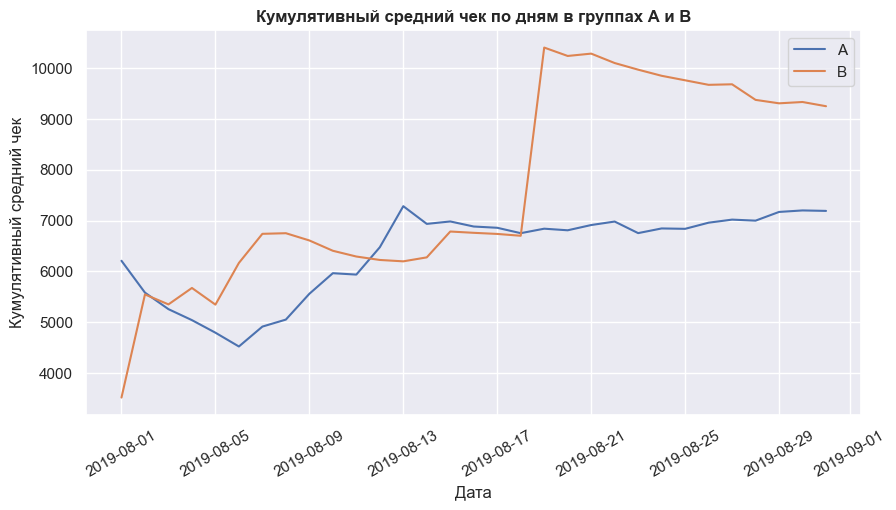

In [71]:
plt.figure(figsize=(10,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивный средний чек по дням в группах А и В', fontsize=12, fontweight='bold')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Кумулятивный средний чек', fontsize=12)
plt.xticks(rotation=30)
plt.legend() 
plt.show()

- Средний чек в группе А выравнивается к середине теста.
- Средний чек в группе В одномоментно существенно вырос и теперь ему требуется больше времени, чтобы прийти к своему реальному среднему значению. Вероятно, имела место одна или несколько очень дорогих покупок.

# Часть 2
## Выполним предварительную обработку данных:

In [39]:
df = pd.read_csv('logs_exp.csv', sep='\t')

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [40]:
df.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [42]:
#переименовка колонок
df.rename(columns = {'EventName':'event_name', 'DeviceIDHash':'user_id', 'EventTimestamp':'event_timestamp', 'ExpId':'exp_id'}, inplace = True)
df.sample()

,event_name,user_id,event_timestamp,exp_id
160027,OffersScreenAppear,6900144526870080372,1565012917,246


In [43]:
#приведение к верному типу данных
df['event_timestamp'] = df['event_timestamp'].astype('datetime64[s]')
df.sample()

,event_name,user_id,event_timestamp,exp_id
80254,OffersScreenAppear,4980045449118619005,2019-08-03 07:55:32,247


In [44]:
#проверка на дубликаты
df.duplicated().sum()

413

In [45]:
#удаление дубликатов
df = df.drop_duplicates()

In [46]:

#добавление столбца с обозначением контрольных групп и эксперементальной А1, А2 и В
df['test_group'] = df['exp_id'].replace(246, 'A1')
df['test_group'] = df['test_group'].replace(247, 'A2')
df['test_group'] = df['test_group'].replace(248, 'B')

In [47]:
df.head(5)

,event_name,user_id,event_timestamp,exp_id,test_group
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,A1
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,A1
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,B
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,B
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,B


In [48]:
users = (df.groupby('test_group').agg({'user_id':'nunique'})
      .reset_index()
      .sort_values(by='user_id', ascending=False)
     )
users

,test_group,user_id
2,B,2542
1,A2,2520
0,A1,2489


## Выведем на экран количество каждого события в порядке убывания частоты:

In [53]:
#посмотрим, сколько раз встречается каждое событие
event_count = df['event_name'].value_counts().reset_index()
event_count

,index,event_name
0,MainScreenAppear,119101
1,OffersScreenAppear,46808
2,CartScreenAppear,42668
3,PaymentScreenSuccessful,34118
4,Tutorial,1018


- Появление главное экрана - 117328к – встречается чаще всего.
- Появление экрана с каталогом продукта - 46333к.
- Появление экрана с корзиной - 42303к.
- Появление экрана с оплатой - 33918к.
- Открытие руководства - 1005.


## Подсчитаем сколько пользователей совершали каждое из этих событий:

In [54]:
#посмотрим, сколько пользователей совершали каждое событие
event_counts_users = df.groupby('event_name')['user_id'].nunique().sort_values(ascending=False).to_frame().reset_index()\
        .rename(columns={'user_id': 'users_count'}) 
event_counts_users

,event_name,users_count
0,MainScreenAppear,7439
1,OffersScreenAppear,4613
2,CartScreenAppear,3749
3,PaymentScreenSuccessful,3547
4,Tutorial,847


- Появление главное экрана - 7439 пользователей – встречается чаще всего.
- Появление экрана с каталогом продукта - 4613 пользователей.
- Появление экрана с корзиной - 3749 пользователей.
- Появление экрана с оплатой - 3547 пользователей.
- Открытие руководства - 847 пользователей.

## Определим количество пользователей в каждой группе:

In [55]:
all_events_count = df.pivot_table(index='event_name', columns='test_group',values='user_id',aggfunc='nunique')\
                       .sort_values('A1',ascending=False)
all_events_count['A1+A2'] = all_events_count['A1'] + all_events_count['A2']
all_events_count.drop(['Tutorial'], inplace=True)
all_events_count

test_group,A1,A2,B,A1+A2
event_name,,,,
MainScreenAppear,2456,2482,2501,4938
OffersScreenAppear,1545,1530,1538,3075
CartScreenAppear,1270,1240,1239,2510
PaymentScreenSuccessful,1202,1160,1185,2362


Добавим в таблицу с числом пользователей по группам значение общей грппы объединяющей контрольные группы А1 и А2

In [56]:
users.loc[3] = ['A1+A2', 4997]
users = users.set_index(users.columns[0])
users

,user_id
test_group,
B,2542
A2,2520
A1,2489
A1+A2,4997


- В группе B - 2542 пользователей.
- В группе A2 - 2520 пользователей.
- В группе A1 - 2489 пользователей.
- В группе A1+A12 - 4997 пользователей.

## Найдём пользователей, которые пересекаются (присутствуют в обоих группах), если они есть:

In [50]:
#проверим группы A1 и A2
#проверим группы A1 и A2
len(np.intersect1d(df.query('test_group == "A1"')['user_id'].unique(), df.query('test_group == "A2"')['user_id'].unique()))

0

In [51]:
#проверим группы A1 и B
len(np.intersect1d(df.query('test_group == "A1"')['user_id'].unique(), df.query('test_group == "B"')['user_id'].unique()))

0

In [52]:
#проверим группы A2 и B
len(np.intersect1d(df.query('test_group == "А2"')['user_id'].unique(), df.query('test_group == "B"')['user_id'].unique()))

0

Во всех группах присутствуют уникальные пользователи (один пользователь не состоит в нескольких группах).

## Проведём A/A тест:

Для проверки гипотез воспользуемся Z-критерием и применим метод Бонферрони (поправка Бонферрони), так как проводим множественное сравнение. В нашем случае мы будем проводить 16 сравнений, следовательно, bonferroni_alpha будет равно alpha / 16.

Сформулируем гипотезы:

H0: Группы 246(А1) и 247(А2) не имеет различий

H1: Группы 246(А1) и 247(А2) отличаются

In [57]:
#функцию для Z-критерия
def print_z_test_with_bonferroni_validation_result(group1, group2, event, alpha): 
    p1_event = all_events_count.loc[event, group1]
    p2_event = all_events_count.loc[event, group2] 
    p1_users = users.loc[group1, 'user_id'] 
    p2_users = users.loc[group2, 'user_id'] 
    p1 = p1_event / p1_users 
    p2 = p2_event / p2_users 
    difference = p1 - p2
    p_combined = (p1_event + p2_event) / (p1_users + p2_users) 
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / p1_users + 1 / p2_users))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    bonferroni_alpha = alpha / 16
    
    print('Проверка для групп {} и {}, событие: {}, p-значение: {p_value:.2f}'.format(group1, group2, event, p_value=p_value))
    if (p_value < bonferroni_alpha):
        print("Отвергаем нулевую гипотезу о равенстве конверсии в группах")
    else:
        print("Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах")

### А/А Тест:

In [58]:
for event in all_events_count.index:
    print_z_test_with_bonferroni_validation_result('A1', 'A2', event, 0.05)
    print()

Проверка для групп A1 и A2, событие: MainScreenAppear, p-значение: 0.59
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах

Проверка для групп A1 и A2, событие: OffersScreenAppear, p-значение: 0.32
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах

Проверка для групп A1 и A2, событие: CartScreenAppear, p-значение: 0.20
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах

Проверка для групп A1 и A2, событие: PaymentScreenSuccessful, p-значение: 0.11
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах



## Проведём A/B тест:

In [59]:
#группы А1 и В

for event in all_events_count.index:
    print_z_test_with_bonferroni_validation_result('A1', 'B', event, 0.05)
    print()

Проверка для групп A1 и B, событие: MainScreenAppear, p-значение: 0.40
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах

Проверка для групп A1 и B, событие: OffersScreenAppear, p-значение: 0.25
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах

Проверка для групп A1 и B, событие: CartScreenAppear, p-значение: 0.11
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах

Проверка для групп A1 и B, событие: PaymentScreenSuccessful, p-значение: 0.23
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах



In [60]:
#группы А2 и В

for event in all_events_count.index:
    print_z_test_with_bonferroni_validation_result('A2', 'B', event, 0.05)
    print()

Проверка для групп A2 и B, событие: MainScreenAppear, p-значение: 0.76
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах

Проверка для групп A2 и B, событие: OffersScreenAppear, p-значение: 0.88
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах

Проверка для групп A2 и B, событие: CartScreenAppear, p-значение: 0.74
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах

Проверка для групп A2 и B, событие: PaymentScreenSuccessful, p-значение: 0.68
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах



In [61]:
#группы А1+А2 и В

for event in all_events_count.index:
    print_z_test_with_bonferroni_validation_result('A1+A2', 'B', event, 0.05)
    print()

Проверка для групп A1+A2 и B, событие: MainScreenAppear, p-значение: 0.12
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах

Проверка для групп A1+A2 и B, событие: OffersScreenAppear, p-значение: 0.38
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах

Проверка для групп A1+A2 и B, событие: CartScreenAppear, p-значение: 0.22
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах

Проверка для групп A1+A2 и B, событие: PaymentScreenSuccessful, p-значение: 0.59
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах



## Выводы: 
О различии долей вывод сделать нельзя. Значит, изменение не повияло на пользователей ни в одну сторону. Если оно внедрялось для улучшения продукта, то заменой пользователей не привлечь. Нужно выполнять изменения в других облостях и повышать интерес пользователей, чтобы они не терялись на этапе просмотра главного экрана.